## EDA On Global Black Money

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('Big_Black_Money_Dataset.csv')
df

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TX0000009996,Singapore,2.209229e+06,Offshore Transfer,2014-02-21 11:00:00,Person_6896,Real Estate,Brazil,False,Illegal,4,4,Bank_258,Luxembourg
9996,TX0000009997,UAE,4.800338e+06,Property Purchase,2014-02-21 12:00:00,Person_6348,Luxury Goods,Russia,False,Legal,10,2,Bank_449,Luxembourg
9997,TX0000009998,UK,4.891953e+05,Stocks Transfer,2014-02-21 13:00:00,Person_4171,Oil & Gas,Russia,False,Illegal,5,0,Bank_156,Cayman Islands
9998,TX0000009999,Brazil,2.233581e+06,Offshore Transfer,2014-02-21 14:00:00,Person_2799,Real Estate,Russia,True,Illegal,10,5,Bank_12,Singapore


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  object 
 1   Country                      10000 non-null  object 
 2   Amount (USD)                 10000 non-null  float64
 3   Transaction Type             10000 non-null  object 
 4   Date of Transaction          10000 non-null  object 
 5   Person Involved              10000 non-null  object 
 6   Industry                     10000 non-null  object 
 7   Destination Country          10000 non-null  object 
 8   Reported by Authority        10000 non-null  bool   
 9   Source of Money              10000 non-null  object 
 10  Money Laundering Risk Score  10000 non-null  int64  
 11  Shell Companies Involved     10000 non-null  int64  
 12  Financial Institution        10000 non-null  object 
 13  Tax Haven Country

In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,Amount (USD),Money Laundering Risk Score,Shell Companies Involved
count,1.000000e+04,10000.000000,10000.000000
mean,2.501818e+06,5.526400,4.469400
std,1.424364e+06,2.893603,2.879773
min,1.003180e+04,1.000000,0.000000
25%,1.279005e+06,3.000000,2.000000
50%,2.501310e+06,6.000000,4.000000
75%,3.722416e+06,8.000000,7.000000
max,4.999812e+06,10.000000,9.000000


In [6]:
df.isnull().sum()

Transaction ID                 0
Country                        0
Amount (USD)                   0
Transaction Type               0
Date of Transaction            0
Person Involved                0
Industry                       0
Destination Country            0
Reported by Authority          0
Source of Money                0
Money Laundering Risk Score    0
Shell Companies Involved       0
Financial Institution          0
Tax Haven Country              0
dtype: int64

In [7]:
df.columns

Index(['Transaction ID', 'Country', 'Amount (USD)', 'Transaction Type',
       'Date of Transaction', 'Person Involved', 'Industry',
       'Destination Country', 'Reported by Authority', 'Source of Money',
       'Money Laundering Risk Score', 'Shell Companies Involved',
       'Financial Institution', 'Tax Haven Country'],
      dtype='object')

In [8]:
df.dtypes

Transaction ID                  object
Country                         object
Amount (USD)                   float64
Transaction Type                object
Date of Transaction             object
Person Involved                 object
Industry                        object
Destination Country             object
Reported by Authority             bool
Source of Money                 object
Money Laundering Risk Score      int64
Shell Companies Involved         int64
Financial Institution           object
Tax Haven Country               object
dtype: object

In [9]:
df = pd.to_datetime(df['Date of Transaction'])
df

0      2013-01-01 00:00:00
1      2013-01-01 01:00:00
2      2013-01-01 02:00:00
3      2013-01-01 03:00:00
4      2013-01-01 04:00:00
               ...        
9995   2014-02-21 11:00:00
9996   2014-02-21 12:00:00
9997   2014-02-21 13:00:00
9998   2014-02-21 14:00:00
9999   2014-02-21 15:00:00
Name: Date of Transaction, Length: 10000, dtype: datetime64[ns]

## Streamlit App Insights

#### 1: Total number of transactions and transaction amount distribution

In [12]:
total_transaction = df['Transaction ID'].nunique()
total_transaction

10000

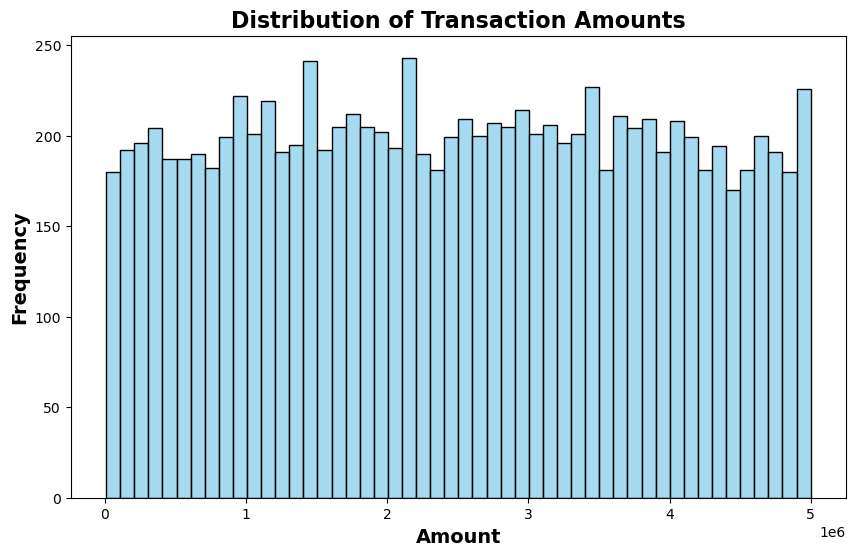

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['Amount (USD)'], bins=50,color='skyblue')
plt.title('Distribution of Transaction Amounts',fontweight='bold',fontsize=16)
plt.xlabel('Amount',fontweight='bold',fontsize=14)
plt.ylabel('Frequency',fontweight='bold',fontsize=14)
plt.show()

#### 2: Top countries involved in black money transactions

In [14]:
df = df.groupby('Country')['Amount (USD)'].sum().reset_index()
df

,Country,Amount (USD)
0,Brazil,2.513360e+09
1,China,2.691667e+09
2,India,2.467653e+09
3,Russia,2.494146e+09
4,Singapore,2.495846e+09
5,South Africa,2.576112e+09
6,Switzerland,2.479312e+09
7,UAE,2.430288e+09
8,UK,2.527723e+09
9,USA,2.342068e+09


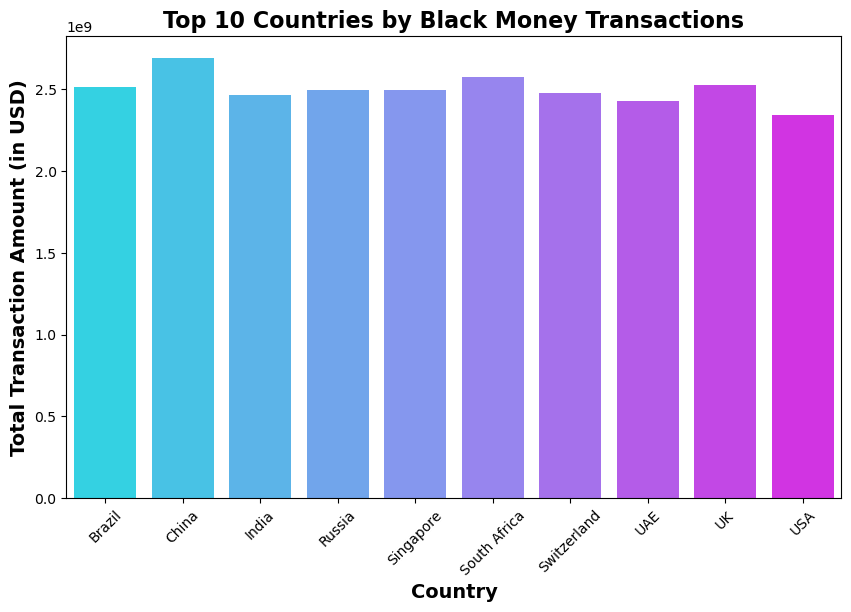

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Amount (USD)', data=df, palette='cool')
plt.title('Top 10 Countries by Black Money Transactions',fontweight='bold',fontsize=16)
plt.xlabel('Country',fontweight='bold',fontsize=14)
plt.ylabel('Total Transaction Amount (in USD)',fontweight='bold',fontsize=14)
plt.xticks(rotation=45)
plt.show()

### 3: Most common transaction types

In [18]:
transaction_types = df['Transaction Type'].value_counts().reset_index()
transaction_types

,Transaction Type,count
0,Property Purchase,2086
1,Stocks Transfer,1983
2,Offshore Transfer,1980
3,Cash Withdrawal,1978
4,Cryptocurrency,1973


In [19]:
df = transaction_types.columns = ['Transaction Type', 'Frequency']
df

['Transaction Type', 'Frequency']

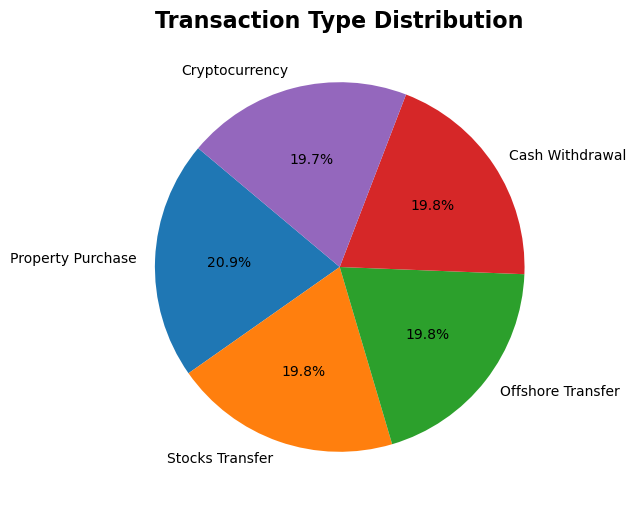

In [23]:
plt.figure(figsize=(6, 6))
transaction_types = df['Transaction Type'].value_counts()
plt.pie(transaction_types, labels=transaction_types.index, autopct='%1.1f%%', startangle=140)
plt.title('Transaction Type Distribution', fontweight='bold', fontsize=16)
plt.show()

## Sales Team Insights

### 4 . Industry Contribution to Total Transactions


In [24]:
Total_Amount_by_Industry = df.groupby('Industry')['Amount (USD)'].sum().reset_index()
Total_Amount_by_Industry

,Industry,Amount (USD)
0,Arms Trade,3.600556e+09
1,Casinos,3.418472e+09
2,Construction,3.705738e+09
3,Finance,3.735923e+09
4,Luxury Goods,3.597893e+09
5,Oil & Gas,3.383659e+09
6,Real Estate,3.575936e+09


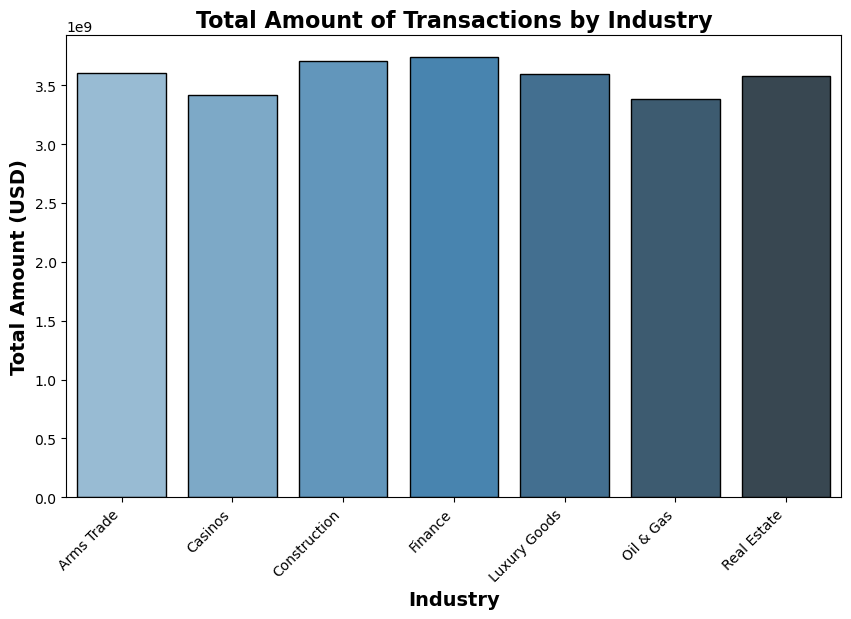

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Industry', y='Amount (USD)', data=Total_Amount_by_Industry, palette='Blues_d',edgecolor='black')
plt.title('Total Amount of Transactions by Industry', fontweight='bold', fontsize=16)
plt.xlabel('Industry', fontweight='bold', fontsize=14)
plt.ylabel('Total Amount (USD)', fontweight='bold', fontsize=14)
plt.xticks(rotation=45,ha='right')
plt.show()

### 5. Distribution of Money Laundering Risk Scores

In [26]:
risk=df['Money Laundering Risk Score'].value_counts().reset_index()
risk

,Money Laundering Risk Score,count
0,9,1073
1,3,1035
2,1,1026
3,10,1020
4,4,1002
5,6,984
6,8,983
7,7,978
8,5,952
9,2,947


In [27]:
risk.columns = ['Risk Score', 'Frequency']
risk.columns

Index(['Risk Score', 'Frequency'], dtype='object')

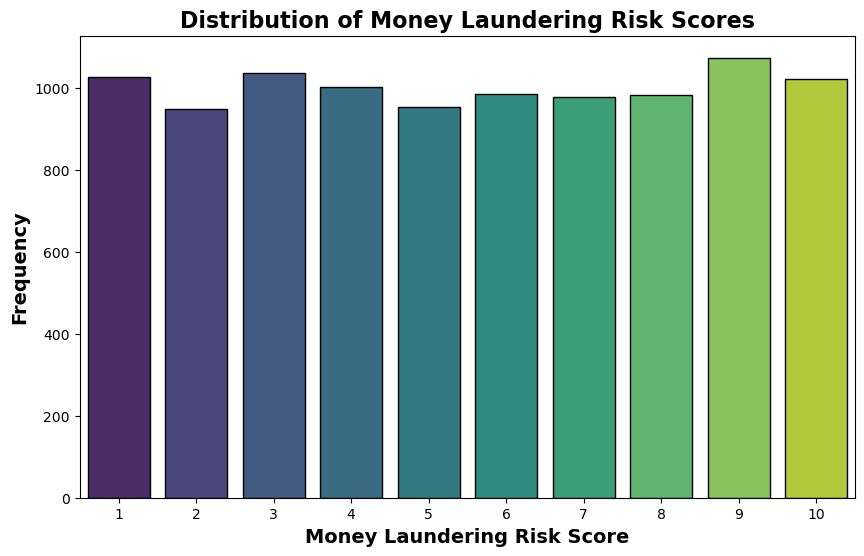

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Risk Score', y='Frequency', data=risk, palette='viridis',edgecolor='black')
plt.title('Distribution of Money Laundering Risk Scores', fontweight='bold', fontsize=16)
plt.xlabel('Money Laundering Risk Score', fontweight='bold', fontsize=14)
plt.ylabel('Frequency', fontweight='bold', fontsize=14)
plt.show()

### 6. Transaction Trends

In [29]:
time_series = df.groupby('Date of Transaction')['Amount (USD)'].sum().reset_index().head(8)
time_series

,Date of Transaction,Amount (USD)
0,2013-01-01 00:00:00,3.267530e+06
1,2013-01-01 01:00:00,4.965767e+06
2,2013-01-01 02:00:00,9.416750e+04
3,2013-01-01 03:00:00,3.864201e+05
4,2013-01-01 04:00:00,6.433784e+05
5,2013-01-01 05:00:00,4.921056e+06
6,2013-01-01 06:00:00,3.262818e+06
7,2013-01-01 07:00:00,4.687205e+06


In [30]:
time_series['Date of Transaction'] = pd.to_datetime(time_series['Date of Transaction'])
time_series['Date of Transaction']

0   2013-01-01 00:00:00
1   2013-01-01 01:00:00
2   2013-01-01 02:00:00
3   2013-01-01 03:00:00
4   2013-01-01 04:00:00
5   2013-01-01 05:00:00
6   2013-01-01 06:00:00
7   2013-01-01 07:00:00
Name: Date of Transaction, dtype: datetime64[ns]

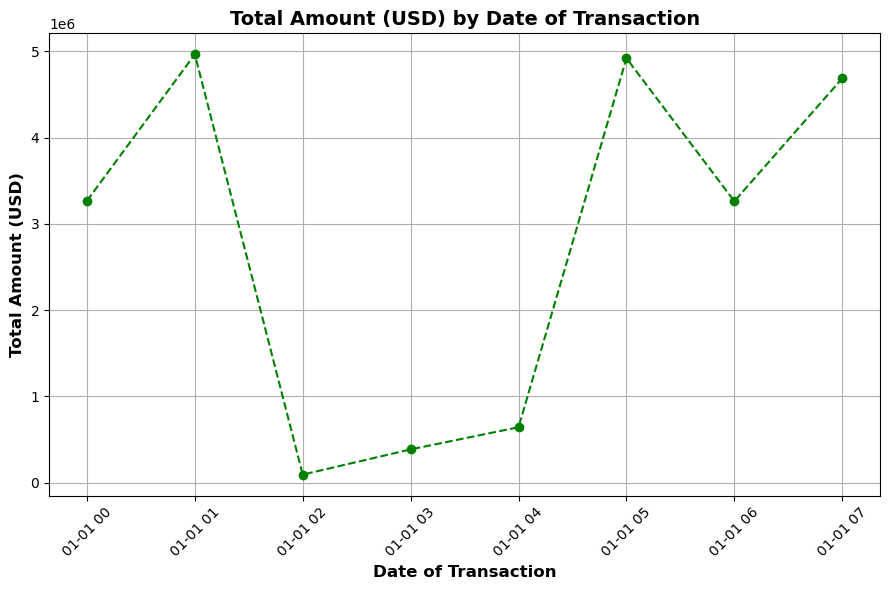

In [31]:
plt.figure(figsize=(9, 6))
plt.plot(time_series['Date of Transaction'], time_series['Amount (USD)'], marker='o',linestyle='--',color='g')
plt.title('Total Amount (USD) by Date of Transaction',fontweight='bold', fontsize=14)
plt.xlabel('Date of Transaction',fontweight='bold', fontsize=12)
plt.ylabel('Total Amount (USD)',fontweight='bold', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

### 7.Top 10 Financial Institutions Linked to Transactions

In [32]:
top_financial_institutions = df['Financial Institution'].value_counts().reset_index().head(10)
top_financial_institutions

,Financial Institution,count
0,Bank_81,36
1,Bank_260,36
2,Bank_100,35
3,Bank_120,34
4,Bank_438,33
5,Bank_428,33
6,Bank_24,31
7,Bank_266,31
8,Bank_321,30
9,Bank_262,30


In [33]:
top_financial_institutions.columns = ['Financial Institution', 'Frequency'] 
top_financial_institutions.columns

Index(['Financial Institution', 'Frequency'], dtype='object')

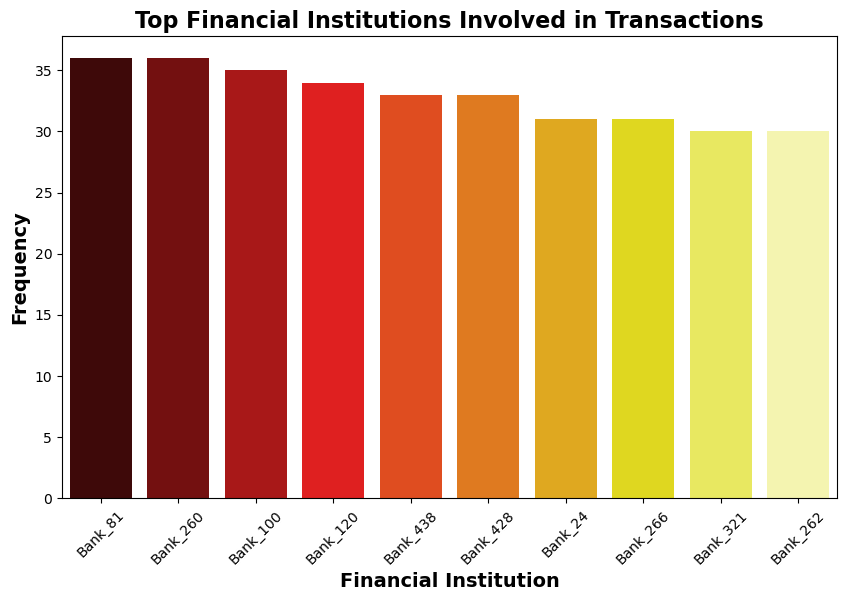

In [34]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x='Financial Institution', y='Frequency', data=top_financial_institutions, palette='hot')
plt.title('Top Financial Institutions Involved in Transactions', fontweight='bold', fontsize=16)
plt.xlabel('Financial Institution', fontweight='bold', fontsize=14)
plt.ylabel('Frequency', fontweight='bold', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### 8. Sources of Money in Transactions

In [35]:
source_of_money = df['Source of Money'].value_counts().reset_index().head(10)
source_of_money

,Source of Money,count
0,Illegal,7017
1,Legal,2983


In [36]:
source_of_money.columns = ['Source of Money', 'Frequency']
source_of_money.columns

Index(['Source of Money', 'Frequency'], dtype='object')

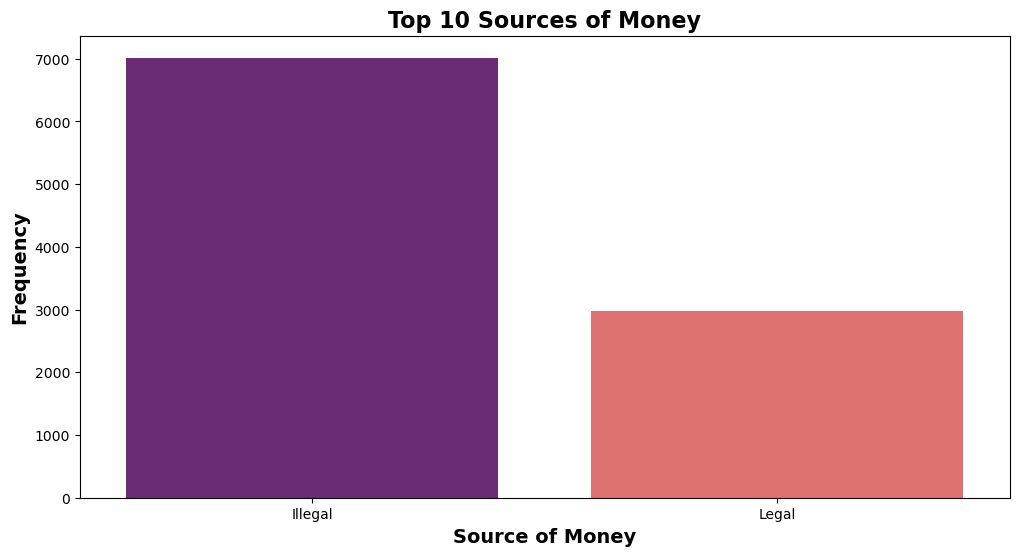

In [37]:
plt.figure(figsize=(12, 6)) 
sns.barplot(x='Source of Money', y='Frequency', data=source_of_money, palette='magma')
plt.title('Top 10 Sources of Money', fontweight='bold', fontsize=16)
plt.xlabel('Source of Money', fontweight='bold', fontsize=14)
plt.ylabel('Frequency', fontweight='bold', fontsize=14)
plt.show()

### 9. Involvement of Shell Companies in Transactions

In [39]:
shell_company_count = df['Shell Companies Involved'].value_counts().reset_index()
shell_company_count

,Shell Companies Involved,count
0,0,1054
1,5,1029
2,2,1000
3,6,995
4,4,995
5,1,990
6,9,990
7,8,986
8,7,982
9,3,979


In [40]:
shell_company_count.columns = ['Shell Companies Involved', 'Frequency']
shell_company_count.columns

Index(['Shell Companies Involved', 'Frequency'], dtype='object')

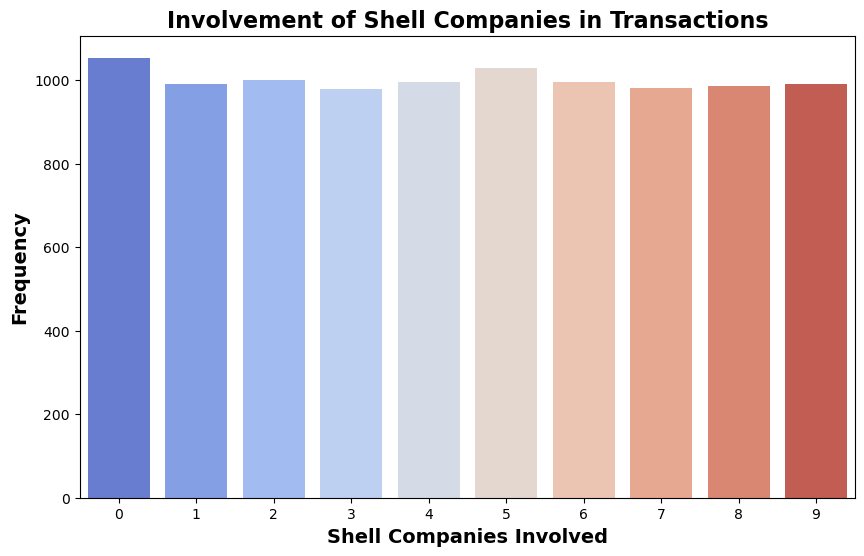

In [41]:
plt.figure(figsize=(10, 6)) 
sns.barplot(x='Shell Companies Involved', y='Frequency', data=shell_company_count, palette='coolwarm')
plt.title('Involvement of Shell Companies in Transactions', fontweight='bold', fontsize=16)
plt.xlabel('Shell Companies Involved', fontweight='bold', fontsize=14)
plt.ylabel('Frequency', fontweight='bold', fontsize=14)
plt.xticks(rotation=0)
plt.show()

### 10. Destination Countries by Total Amount (USD)

In [42]:
amount_by_country = df.groupby('Destination Country')['Amount (USD)'].sum().sort_values(ascending=False).reset_index().head(10)
amount_by_country

,Destination Country,Amount (USD)
0,USA,2.617701e+09
1,Russia,2.556771e+09
2,Singapore,2.551282e+09
3,India,2.551014e+09
4,Switzerland,2.530623e+09
5,South Africa,2.512795e+09
6,UK,2.468947e+09
7,China,2.457509e+09
8,UAE,2.396454e+09
9,Brazil,2.375080e+09


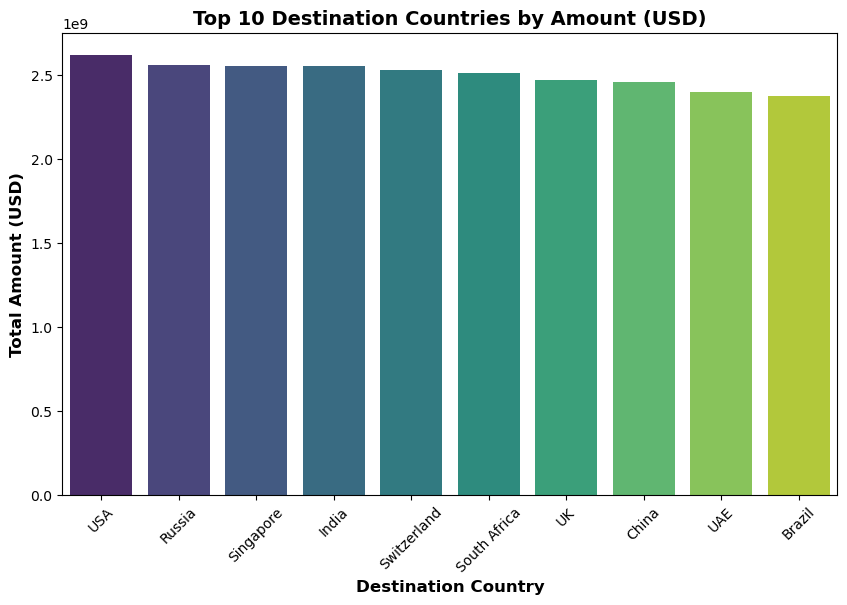

In [43]:
plt.figure(figsize=(10, 6))  
sns.barplot(x='Destination Country', y='Amount (USD)', data=amount_by_country, palette='viridis')
plt.title('Top 10 Destination Countries by Amount (USD)', fontweight='bold', fontsize=14)
plt.xlabel('Destination Country', fontweight='bold', fontsize=12)
plt.ylabel('Total Amount (USD)', fontweight='bold', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### 11. Distribution of Reports by Authority

In [44]:
reported_by_authority = df['Reported by Authority'].value_counts(normalize=True) * 100
reported_by_authority

Reported by Authority
False    79.95
True     20.05
Name: proportion, dtype: float64

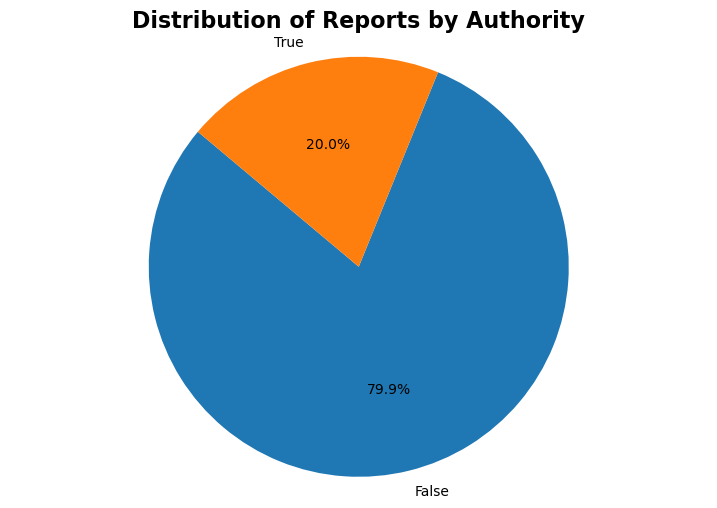

In [45]:
plt.figure(figsize=(9, 6))  
plt.pie(reported_by_authority, labels=reported_by_authority.index, autopct='%1.1f%%', startangle=140,)
plt.title('Distribution of Reports by Authority', fontweight='bold', fontsize=16)
plt.axis('equal')
plt.show()

### Insight 12 Country-wise Transaction Overview

In [3]:
high_risk_transactions = df[df['Money Laundering Risk Score'] >= 10]
high_risk_transactions

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
24,TX0000000025,USA,1.001674e+06,Property Purchase,2013-01-02 00:00:00,Person_587,Real Estate,USA,False,Illegal,10,1,Bank_209,Luxembourg
42,TX0000000043,UK,2.922019e+05,Cash Withdrawal,2013-01-02 18:00:00,Person_4033,Real Estate,UK,False,Illegal,10,1,Bank_45,Switzerland
51,TX0000000052,Switzerland,9.647198e+05,Offshore Transfer,2013-01-03 03:00:00,Person_298,Construction,China,False,Legal,10,2,Bank_42,Cayman Islands
57,TX0000000058,Russia,6.596420e+04,Property Purchase,2013-01-03 09:00:00,Person_1172,Luxury Goods,Singapore,True,Legal,10,6,Bank_3,Bahamas
62,TX0000000063,USA,2.177304e+06,Stocks Transfer,2013-01-03 14:00:00,Person_6310,Real Estate,Russia,False,Illegal,10,9,Bank_146,Bahamas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,TX0000009963,UAE,4.494310e+06,Property Purchase,2014-02-20 02:00:00,Person_4276,Arms Trade,Russia,True,Illegal,10,9,Bank_177,Switzerland
9981,TX0000009982,China,9.953155e+05,Cryptocurrency,2014-02-20 21:00:00,Person_5862,Arms Trade,UAE,False,Illegal,10,4,Bank_135,Panama
9988,TX0000009989,UAE,2.617680e+06,Stocks Transfer,2014-02-21 04:00:00,Person_3001,Construction,China,False,Illegal,10,8,Bank_47,Bahamas
9996,TX0000009997,UAE,4.800338e+06,Property Purchase,2014-02-21 12:00:00,Person_6348,Luxury Goods,Russia,False,Legal,10,2,Bank_449,Luxembourg


In [6]:
df = high_risk_transactions[['Country', 'Amount (USD)', 'Transaction Type']].reset_index()
df

,index,Country,Amount (USD),Transaction Type
0,24,USA,1.001674e+06,Property Purchase
1,42,UK,2.922019e+05,Cash Withdrawal
2,51,Switzerland,9.647198e+05,Offshore Transfer
3,57,Russia,6.596420e+04,Property Purchase
4,62,USA,2.177304e+06,Stocks Transfer
...,...,...,...,...
1015,9962,UAE,4.494310e+06,Property Purchase
1016,9981,China,9.953155e+05,Cryptocurrency
1017,9988,UAE,2.617680e+06,Stocks Transfer
1018,9996,UAE,4.800338e+06,Property Purchase


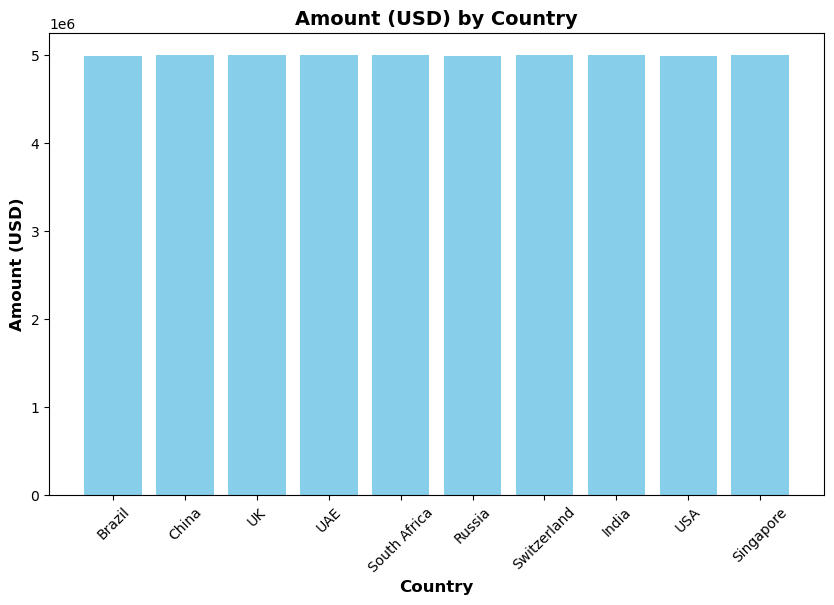

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(df['Country'], df['Amount (USD)'], color='skyblue')
plt.xlabel('Country',fontweight='bold',fontsize=12)
plt.ylabel('Amount (USD)',fontweight='bold',fontsize=12)
plt.title('Amount (USD) by Country',fontweight='bold',fontsize=14)
plt.xticks(rotation=45)
plt.show()

## 13 Operation Teams insights

In [21]:
supply_chain_summary = df.groupby(['Country', 'Destination Country']).agg({'Amount (USD)': 'sum'}).reset_index()
supply_chain_summary

,Country,Destination Country,Amount (USD)
0,Brazil,Brazil,2.596193e+08
1,Brazil,China,2.374446e+08
2,Brazil,India,2.426080e+08
3,Brazil,Russia,2.565302e+08
4,Brazil,Singapore,2.408323e+08
...,...,...,...
95,USA,South Africa,2.138645e+08
96,USA,Switzerland,2.151982e+08
97,USA,UAE,2.127059e+08
98,USA,UK,2.508674e+08


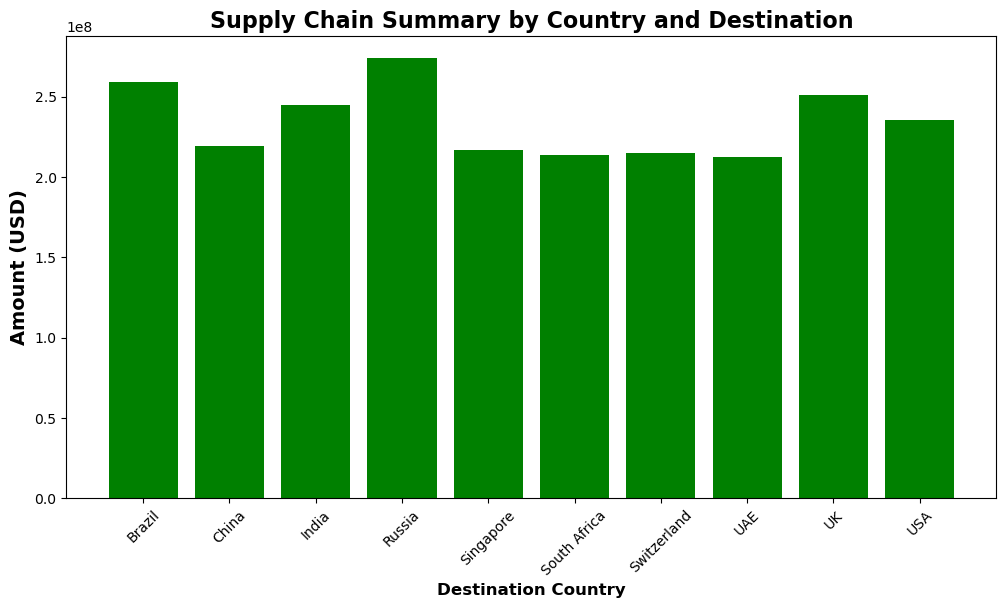

In [40]:
plt.figure(figsize=(12, 6))
plt.bar(country_data['Destination Country'], country_data['Amount (USD)'], label=country,color='g')
plt.xlabel('Destination Country', fontweight='bold', fontsize=12)
plt.ylabel('Amount (USD)', fontweight='bold', fontsize=14)
plt.title('Supply Chain Summary by Country and Destination',fontweight='bold',fontsize=16)
plt.xticks(rotation=45)
plt.show()